# Testing algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance


import optuna

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

df = pd.read_csv('/home/genkibaskervillge/Documents/Cars-price-prediction-Data-Science/Convert Data to Numeric/convert_number_data.csv')
df.head()

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,fuelConsumption,fuelType,height,length,modelDate,numberOfDoors,numberOfForwardGears,payload,price,roofLoad,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vEfuelType,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,3,4,1020.0,1375.0,1,6.0,218.0,1781.0,55.0,9.1,0,1415.0,4159.0,1999,3,6.0,560.0,42.247,75.0,5.0,238.0,270.0,1781.0,154.0,1,3.0,2,1935.0,2519.0,1763.0
1,7.8,7,4,1680.0,1745.0,1,2.0,115.0,1968.0,73.0,5.9,1,1494.0,4939.0,2018,5,7.0,680.0,68.930,100.0,5.0,241.0,400.0,1968.0,150.0,1,2.0,1,2425.0,2924.0,1886.0
2,9.2,7,30,1668.0,1188.0,0,4.0,146.0,1798.0,50.0,6.2,0,1480.0,4590.0,2015,5,6.0,602.0,30.580,75.0,5.0,210.0,174.0,1798.0,104.0,1,3.0,2,1790.0,2595.0,1770.0
3,9.5,7,4,1680.0,1685.0,0,1.0,109.0,1968.0,73.0,5.4,1,1494.0,4939.0,2018,5,7.0,645.0,64.510,100.0,5.0,219.0,370.0,1968.0,120.0,1,2.0,1,2330.0,2924.0,1886.0
4,7.0,7,4,1680.0,1680.0,0,2.0,144.0,1984.0,73.0,7.4,0,1494.0,4939.0,2018,5,7.0,630.0,69.770,100.0,5.0,250.0,370.0,1984.0,180.0,1,3.0,1,2310.0,2924.0,1886.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75995 entries, 0 to 75994
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         73763 non-null  float64
 1   bodyType                 75995 non-null  int64  
 2   brand                    75995 non-null  int64  
 3   cargoVolume              74946 non-null  float64
 4   curbWeight               75769 non-null  float64
 5   driveWheelConfiguration  75995 non-null  int64  
 6   eLabel                   75995 non-null  float64
 7   emissionsCO2             61705 non-null  float64
 8   engineCapacity           75818 non-null  float64
 9   fuelCapacity             75815 non-null  float64
 10  fuelConsumption          74862 non-null  float64
 11  fuelType                 75995 non-null  int64  
 12  height                   75925 non-null  float64
 13  length                   75974 non-null  float64
 14  modelDate             

In [4]:
df.duplicated().sum()

2294

In [5]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
emissionsCO2,14290,0.188039
roofLoad,11222,0.147668
accelerationTime,2232,0.029370
numberOfForwardGears,1969,0.025910
seatingCapacity,1969,0.025910
fuelConsumption,1133,0.014909
cargoVolume,1049,0.013804
payload,1019,0.013409
weightTotal,1012,0.013317
speed,780,0.010264


In [6]:
df.nunique()

accelerationTime             227
bodyType                      10
brand                         89
cargoVolume                 1043
curbWeight                  1599
driveWheelConfiguration        3
eLabel                         8
emissionsCO2                 381
engineCapacity               768
fuelCapacity                  97
fuelConsumption              194
fuelType                       9
height                       645
length                      1229
modelDate                     51
numberOfDoors                  4
numberOfForwardGears           8
payload                      822
price                      26125
roofLoad                      38
seatingCapacity                8
speed                        225
torque                       472
vEengineDisplacement         768
vEenginePower                369
vEengineType                   4
vEfuelType                    10
vehicleTransmission            5
weightTotal                 1003
wheelbase                    573
width     

# Drop null method

In [31]:
print(f'Before dropping missing values, we have {df.shape[0]} instances')
df2 = df.dropna()
print(f'After dropping missing values, we have {df.shape[0]} instances')
# to see how mnay instances we have lost
print(f'We have lost {df.shape[0]-df2.shape[0]} instances, which means % {round((df.shape[0]-df2.shape[0])/ (float(df.shape[0])),2)*100} data we have lost')

Before dropping missing values, we have 75995 instances
After dropping missing values, we have 75995 instances
We have lost 27393 instances, which means % 36.0 data we have lost


In [32]:
df2.isnull().sum()

accelerationTime           0
bodyType                   0
brand                      0
cargoVolume                0
curbWeight                 0
driveWheelConfiguration    0
eLabel                     0
emissionsCO2               0
engineCapacity             0
fuelCapacity               0
fuelConsumption            0
fuelType                   0
height                     0
length                     0
modelDate                  0
numberOfDoors              0
numberOfForwardGears       0
payload                    0
price                      0
roofLoad                   0
seatingCapacity            0
speed                      0
torque                     0
vEengineDisplacement       0
vEenginePower              0
vEengineType               0
vEfuelType                 0
vehicleTransmission        0
weightTotal                0
wheelbase                  0
width                      0
dtype: int64

## Baseline model

In [9]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression() and  rmse score is : 16.158214119960007, r2 score is 0.6266430495199069


## Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer

In [14]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
# feature scaler
norm = MinMaxScaler().fit(X)
X = norm.transform(X)
y= df2['price']
y = np.log(df2['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

NameError: name 'skew_cols' is not defined

## Random Forest& Gradient Boosting & Extra Trees & XGBoost

In [33]:
rmse_test =[]
r2_test =[]
model_names =[]

X= df2.drop('price', axis=1)
# feature scaler
# norm = MinMaxScaler().fit(X)
# X = norm.transform(X)
y= df2['price']
y = np.log(df2['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 0.08, r2 score is 0.9791
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 0.1, r2 score is 0.9632
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 0.08, r2 score is 0.9782
model : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) and  rmse score is : 0.07, r2 score is 0.9809


,RMSE,R2_Test
RandomForest,0.08,0.98
GradientBoost,0.10,0.96
ExtraTree,0.08,0.98
XGB,0.07,0.98


## Best Model with the Hyperparameter Tuning

In [34]:
X= df2.drop('price', axis=1)
# feature scaler
# norm = MinMaxScaler().fit(X)
# X = norm.transform(X)
y= df2['price']
y = np.log(df2['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 0.0768, r2 score is 0.9791


# Fill median value

In [27]:
from sklearn.impute import SimpleImputer, KNNImputer

df2 = df.fillna(df.median())  # fill median
# df2 = df.fillna(df.mode())  # fill mode

X= df2.drop('price', axis=1)
y= df2['price']
y = np.log(df2['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# norm = MinMaxScaler().fit(X_train)
# X_train = norm.transform(X_train)
# X_test = norm.transform(X_test)

df2.isnull().sum()

accelerationTime           0
bodyType                   0
brand                      0
cargoVolume                0
curbWeight                 0
driveWheelConfiguration    0
eLabel                     0
emissionsCO2               0
engineCapacity             0
fuelCapacity               0
fuelConsumption            0
fuelType                   0
height                     0
length                     0
modelDate                  0
numberOfDoors              0
numberOfForwardGears       0
payload                    0
price                      0
roofLoad                   0
seatingCapacity            0
speed                      0
torque                     0
vEengineDisplacement       0
vEenginePower              0
vEengineType               0
vEfuelType                 0
vehicleTransmission        0
weightTotal                0
wheelbase                  0
width                      0
dtype: int64

In [28]:
rmse_test =[]
r2_test =[]
model_names =[]


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 0.1, r2 score is 0.9742
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 0.13, r2 score is 0.9515
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 0.09, r2 score is 0.9747
model : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) and  rmse score is : 0.09, r2 score is 0.9748


,RMSE,R2_Test
RandomForest,0.10,0.97
GradientBoost,0.13,0.95
ExtraTree,0.09,0.97
XGB,0.09,0.97


In [29]:
rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 0.0954, r2 score is 0.9743


## Feature Importance

accelerationTime : 0.01
bodyType : 0.004
brand : 0.006
cargoVolume : 0.003
curbWeight : 0.573
driveWheelConfiguration : 0.003
emissionsCO2 : 0.002
engineCapacity : 0.003
fuelCapacity : 0.004
fuelConsumption : 0.004
height : 0.005
length : 0.005
modelDate : 0.011
numberOfDoors : 0.002
numberOfForwardGears : 0.005
payload : 0.002
roofLoad : 0.001
speed : 0.013
torque : 0.138
vEengineDisplacement : 0.003
vEenginePower : 0.168
vehicleTransmission : 0.003
weightTotal : 0.02
wheelbase : 0.003
width : 0.009



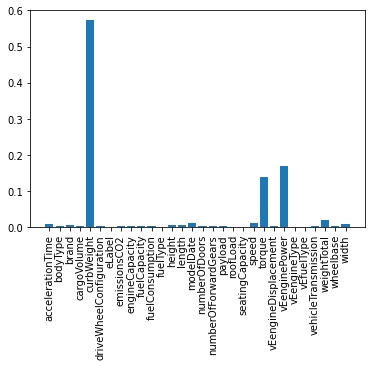

In [30]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()